# Final Project- NCAA Men's Basketball

Ellen Buckley

## Table of Contents
   ### 1. Introduction
         1.1 Motivation
         1.2 Data Description
         1.3 Data Download
   ### 2. Data Exploration and Analysis
         2.1 Do teams foul more in close games?
         2.2 Have teams improved over the years?
         2.3 How do conferences compare?
         2.4 Losing team stats v. winning team stats- where is the discrepancy?
         2.5 Home Team Advantage
         2.6 UVA Basketball is the Best
   ### 3. Conclusions
      

## 1. Introduction

### 1.1 Motivation
I'm a big fan of UVA men's basketball. UVA has a very unique style of basketball- they are known for their pack line defense, and a slow pace, resulting in low scoring games. Some have called this style of play "boring," but I dont think being consistently ranked in the top five teams in the NCAA is boring. Anyway, I love watching basketball and would like to know more about basketball stats, what makes a good team, and what makes UVA unique.

### 1.2 Data

Kaggle has a March Madness machine learning competition every year. A large amount of historical NCAA data is provided to participants. I will be looking at the historical NCAA men's basketball data. These data are available for download through the simple API:
kaggle competitions download -c mens-machine-learning-competition-2018

The amount of data and statistics available is very overwhelming. For this project, I used only a fraction of the data available:
 - NCAATourneyDetailedResults.csv (for tournament team statistics)
 - RegularSeasonDetailedResults.csv (for regular season team statistics)
 - TeamConferences.csv (for identifying teams)

These data go from the 2002-2003 season to the 2016-2017 season. For additional information about the data fields please see:
https://www.kaggle.com/c/mens-machine-learning-competition-2018/data

### 1.3 Data Downoad

In [470]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import seaborn as sns

season=pd.read_csv('/Users/ellenbuckley/Documents/UMD/2018_bFall/CMSC641/cmsc641-fall2018/projectFinal/basketball/DataFiles/RegularSeasonDetailedResults.csv')

In [471]:
#creating new fields
season['MOV']= [row['WScore']-row['LScore'] for index, row in season.iterrows()]

#more stats for winners
season['WFGP']= [row['WFGM']/float(row['WFGA']) for index, row in season.iterrows()]
season['WFGP3']= [row['WFGM3']/float(row['WFGA3']) for index, row in season.iterrows()]
season['WFTP']=np.nan
season.loc[season['WFTA'] > 0,'WFTP']= [row['WFTM']/float(row['WFTA']) for index, row in season.iterrows() if row.WFTA>0]

#more stats for losers
season['LFGP']= [row['LFGM']/float(row['LFGA']) for index, row in season.iterrows()]
season['LFGP3']= [row['LFGM3']/float(row['LFGA3']) for index, row in season.iterrows()]
season['LFTP']=np.nan
season.loc[season['LFTA'] > 0,'LFTP']= [row['LFTM']/float(row['LFTA']) for index, row in season.iterrows() if row.LFTA>0]

# reading in conference ID Team ID match for later
conf= pd.read_csv('/Users/ellenbuckley/Documents/UMD/2018_bFall/CMSC641/cmsc641-fall2018/projectFinal/basketball/DataFiles/TeamConferences.csv')
team_csv=pd.read_csv('/Users/ellenbuckley/Documents/UMD/2018_bFall/CMSC641/cmsc641-fall2018/projectFinal/basketball/DataFiles/Teams.csv')
uva_id= team_csv[team_csv['TeamName']=='Virginia'].TeamID

season.head()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LStl,LBlk,LPF,MOV,WFGP,WFGP3,WFTP,LFGP,LFGP3,LFTP
0,2003,10,1104,68,1328,62,N,0,27,58,...,9,2,20,6,0.465517,0.214286,0.611111,0.415094,0.200000,0.727273
1,2003,10,1272,70,1393,63,N,0,26,62,...,8,6,16,7,0.419355,0.400000,0.526316,0.358209,0.250000,0.450000
2,2003,11,1266,73,1437,61,N,0,24,58,...,2,5,23,12,0.413793,0.444444,0.586207,0.301370,0.115385,0.608696
3,2003,11,1296,56,1457,50,N,0,18,38,...,4,3,23,6,0.473684,0.333333,0.548387,0.367347,0.272727,0.533333
4,2003,11,1400,77,1208,71,N,0,30,61,...,7,1,14,6,0.491803,0.428571,0.846154,0.387097,0.375000,0.629630


In [472]:
#here I'm spliting each row into losing team stats and winning team stats then concatenating

temp= season[['Season','DayNum','WTeamID','WLoc','WFGP','WFGP3','WFTP']]
temp['Win']=1
temp= temp.rename(index=str,columns={"WTeamID": "TeamID" ,"WLoc":'Loc','WFGP':'FGP','WFGP3':'FGP3','WFTP':'FTP'})

temp2=season[['Season','DayNum','LTeamID','WLoc','LFGP','LFGP3','LFTP']]
temp2['Win']=0
#switching the location of the game because WLoc associated w winning team
temp2[temp2.WLoc=='H'].WLoc='Away'
temp2[temp2.WLoc=='A'].WLoc='Home'
temp2[temp2.WLoc=='Home'].WLoc='H'
temp2[temp2.WLoc=='Away'].WLoc='A'
temp2= temp2.rename(columns={"LTeamID": "TeamID" ,'WLoc':'Loc','LFGP':'FGP','LFGP3':'FGP3','LFTP':'FTP'})

all_stats= pd.concat([temp, temp2], ignore_index=True)
all_stats.head()

/Users/ellenbuckley/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/ellenbuckley/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ellenbuckley/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Season,DayNum,TeamID,Loc,FGP,FGP3,FTP,Win
0,2003,10,1104,N,0.465517,0.214286,0.611111,1
1,2003,10,1272,N,0.419355,0.400000,0.526316,1
2,2003,11,1266,N,0.413793,0.444444,0.586207,1
3,2003,11,1296,N,0.473684,0.333333,0.548387,1
4,2003,11,1400,N,0.491803,0.428571,0.846154,1


## 2.  Data Exploration and Analysis

### 2.1 Do teams foul more in close games?
MOV and number of fouls. I thought there would be a relationship between margin of victory and losing team fouls (higher losing team personal fouls for a lower margin of victory). I chose a kde plot because the scatter plot shows so many data points and this kde contour makes things more clear. But the r-correlation of -0.09 shows there is essentially no correlation between these stats.

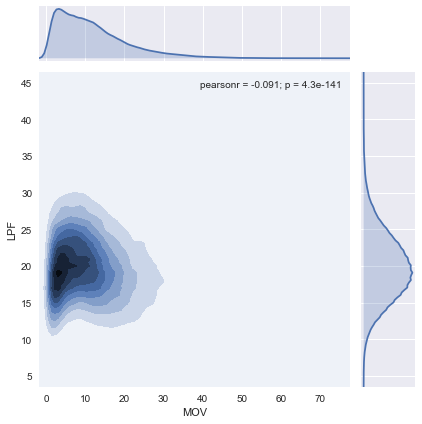

In [473]:
sns.jointplot(x="MOV", y="LPF", data=season, kind='kde')

### 2.2 Have teams improved over the years?

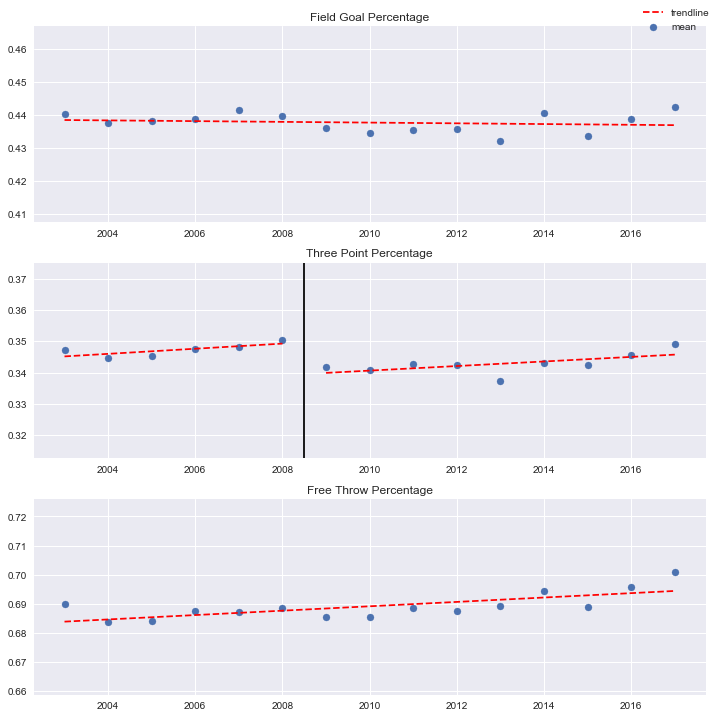

In [474]:
#grouping by year, creating trendlines

FGP_stat=all_stats.groupby(['Season'])['FGP'].describe()
FGP3_stat=all_stats.groupby(['Season'])['FGP3'].describe()
FTP_stat=all_stats.groupby(['Season'])['FTP'].describe()

z1 = np.polyfit(FGP_stat.index, FGP_stat['mean'], 1)
s1, int1= np.poly1d(z1)

z2_1 = np.polyfit(FGP3_stat.index[FGP3_stat.index<=2008], FGP3_stat[FGP3_stat.index<=2008]['mean'], 1)
s2_1, int2_1 = np.poly1d(z2_1)

z2_2 = np.polyfit(FGP3_stat.index[FGP3_stat.index>2008], FGP3_stat[FGP3_stat.index>2008]['mean'], 1)
s2_2, int2_2 = np.poly1d(z2_2)

z3 = np.polyfit(FTP_stat.index, FTP_stat['mean'], 1)
s3, int3 = np.poly1d(z3)

fig = plt.figure()
#fig.suptitle("Title for whole figure", fontsize=16)
fig.set_size_inches(10,10)

ax1= plt.subplot(3, 1, 1)
ax1.scatter(FGP_stat.index, FGP_stat['mean'])
ax1.plot(FGP_stat.index,p1(FGP_stat.index),"r--", label='trendline')
ax1.set_title('Field Goal Percentage')

handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles, ['mean','trendline'], loc='upper right')
#import matplotlib.patches as mpatches
#m = mpatches.Patch(color='blue', label='The red data')
#tl= mpatches.Patch(color='red', label='The red data')
fig.legend(handles, labels)

ax2=plt.subplot(3, 1, 2)
ax2.scatter(FGP3_stat.index, FGP3_stat['mean'])
ax2.plot(FTP_stat.index[FGP3_stat.index<=2008],p2_1(FTP_stat.index[FGP3_stat.index<=2008]),"r--")
ax2.plot(FTP_stat.index[FGP3_stat.index>2008],p2_2(FTP_stat.index[FGP3_stat.index>2008]),"r--")

ax2.set_title('Three Point Percentage')
ax2.axvline(2008.5, color='k') #Three point arc moved back 1 foot to 20' 9" before 2008-2009 season

ax3=plt.subplot(3, 1, 3)
ax3.scatter(FTP_stat.index, FTP_stat['mean'])
ax3.plot(FTP_stat.index,p3(FTP_stat.index),"r--")
ax3.set_title('Free Throw Percentage')

#handles, labels = ax3.get_legend_handles_labels()

fig.tight_layout()


In [475]:
#printing out stats to decribe these trends in paragraph below
print(FGP_stat.loc[2003,'mean'],FGP_stat.loc[2017,'mean'],s1*100*10,FGP3_stat.loc[2003,'mean'],FGP3_stat.loc[2008,'mean'],s2_1*100*10,FGP3_stat.loc[2009,'mean'],s2_2*100*10,FGP3_stat.loc[2017,'mean'],s3*10*100,FTP_stat.loc[2003,'mean'],FTP_stat.loc[2017,'mean'])

0.440156603577 0.442258543967 -0.11121433746 0.347109290765 0.350485909041 0.822958941292 0.341795182162 0.733606549533 0.349268277985 0.753549569709 0.689998670379 0.700970444387


Field goal shooting has not changed much from 44.0% in the 2002-2003 season to 44.2% in the 2016-2017 season (the trendline shows a rate of -0.11% per decade). Three point shooting improved from 34.7% in the 2002-2003 season to 35.0% in the 2007-2008 season (0.82% per decade). The three point line was moved back 1 foot in 2008 and dropped to 34.2% for the 2008-2009 season, since then it has improved at a rate of 0.73%  per decade to 34.9% in the 2016-2017 season. Free point percentages have increased 0.75% per decade. This show some increase in performance over the years. Not much change in these stats overall, but slightly increasing in free throws and three pointers. There is a clear drop in three point percentage the year following the three point line extention.

### 2.3 How do conferences compare?

In [476]:
#adding conferences by merging

all_stats_conf=pd.merge(all_stats,conf,left_on=['Season','TeamID'],right_on=['Season','TeamID'],how='inner')
all_stats_conf.head()

,Season,DayNum,TeamID,Loc,FGP,FGP3,FTP,Win,ConfAbbrev
0,2003,10,1104,N,0.465517,0.214286,0.611111,1,sec
1,2003,18,1104,H,0.489796,0.500000,0.705882,1,sec
2,2003,21,1104,H,0.457627,0.333333,0.782609,1,sec
3,2003,25,1104,N,0.280702,0.280000,0.714286,1,sec
4,2003,29,1104,H,0.485714,0.409091,0.800000,1,sec


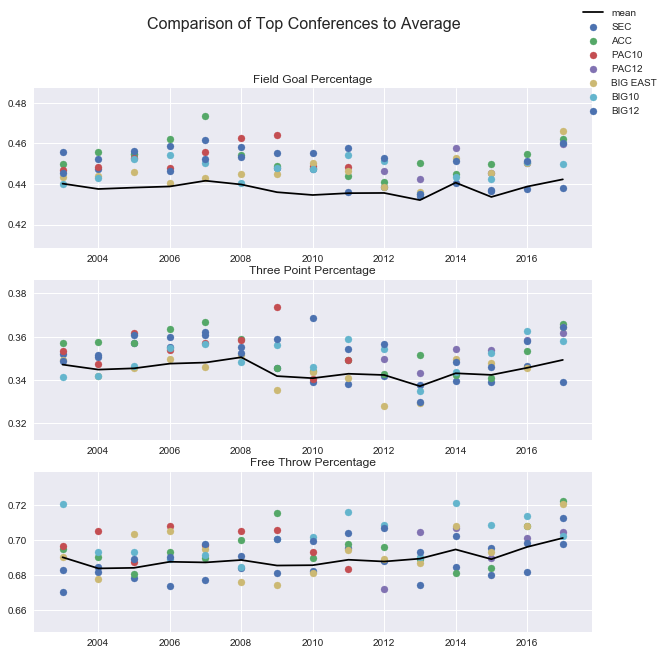

In [477]:
#choose top six conferences based on the stat that a team 
#from one of these six conferences wins the tournament every year 

#conf.ConfAbbrev.unique() 
fig = plt.figure()
fig.suptitle("Comparison of Top Conferences to Average", fontsize=16)
fig.set_size_inches(10,10)

for x in ['sec','acc','pac_ten','pac_twelve','big_east','big_ten','big_twelve']:

    test=all_stats_conf[all_stats_conf.ConfAbbrev==x].groupby(['Season']).mean()
    ax1= plt.subplot(3, 1, 1)
    ax1.scatter(test.index,test.FGP,label=x)    
    ax2= plt.subplot(3, 1, 2)
    ax2.scatter(test.index,test.FGP3,label=x)
    ax3= plt.subplot(3, 1, 3)
    ax3.scatter(test.index,test.FTP,label=x)

ax1.plot(FGP_stat.index, FGP_stat['mean'],'k')    
ax2.plot(FGP3_stat.index, FGP3_stat['mean'],'k')
ax3.plot(FTP_stat.index, FTP_stat['mean'],'k')
ax1.set_title('Field Goal Percentage')
ax2.set_title('Three Point Percentage')
ax3.set_title('Free Throw Percentage')
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, ['mean','SEC','ACC','PAC10','PAC12','BIG EAST','BIG10','BIG12'])



You can see that these conferences are definitely better at field goals than the average.

### 2.4 Losing team stats v. winning team stats- where is the discrepancy?

In [478]:
season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LStl,LBlk,LPF,MOV,WFGP,WFGP3,WFTP,LFGP,LFGP3,LFTP
0,2003,10,1104,68,1328,62,N,0,27,58,...,9,2,20,6,0.465517,0.214286,0.611111,0.415094,0.200000,0.727273
1,2003,10,1272,70,1393,63,N,0,26,62,...,8,6,16,7,0.419355,0.400000,0.526316,0.358209,0.250000,0.450000
2,2003,11,1266,73,1437,61,N,0,24,58,...,2,5,23,12,0.413793,0.444444,0.586207,0.301370,0.115385,0.608696
3,2003,11,1296,56,1457,50,N,0,18,38,...,4,3,23,6,0.473684,0.333333,0.548387,0.367347,0.272727,0.533333
4,2003,11,1400,77,1208,71,N,0,30,61,...,7,1,14,6,0.491803,0.428571,0.846154,0.387097,0.375000,0.629630


In [479]:
season['FGP_diff']= pd.Series(season['WFGP']-season['LFGP'])
season['FGP3_diff']= pd.Series(season['WFGP3']-season['LFGP3'])
season['FTP_diff']= pd.Series(season['WFTP']-season['LFTP'])

heat=season[['WLoc','MOV','WFGP','WFGP3','WFTP','LFGP','LFGP3','LFTP','FGP_diff','FGP3_diff','FTP_diff']]
heat=heat.corr()
heat

,MOV,WFGP,WFGP3,WFTP,LFGP,LFGP3,LFTP,FGP_diff,FGP3_diff,FTP_diff
MOV,1.000000,0.363667,0.189497,0.036138,-0.386966,-0.214603,-0.121172,0.585719,0.300415,0.118981
WFGP,0.363667,1.000000,0.461485,-0.019536,0.179919,0.141545,0.068410,0.654934,0.256983,-0.066603
WFGP3,0.189497,0.461485,1.000000,0.014091,0.159700,0.101799,0.053244,0.243343,0.703295,-0.032414
WFTP,0.036138,-0.019536,0.014091,1.000000,0.114721,0.067241,0.051547,-0.103627,-0.037116,0.621717
LFGP,-0.386966,0.179919,0.159700,0.114721,1.000000,0.446590,0.009522,-0.625520,-0.195204,0.068493
LFGP3,-0.214603,0.141545,0.101799,0.067241,0.446590,1.000000,0.017695,-0.230814,-0.635610,0.030650
LFTP,-0.121172,0.068410,0.053244,0.051547,0.009522,0.017695,1.000000,0.046942,0.028672,-0.750153
FGP_diff,0.585719,0.654934,0.243343,-0.103627,-0.625520,-0.230814,0.046942,1.000000,0.353786,-0.105440
FGP3_diff,0.300415,0.256983,0.703295,-0.037116,-0.195204,-0.635610,0.028672,0.353786,1.000000,-0.047054
FTP_diff,0.118981,-0.066603,-0.032414,0.621717,0.068493,0.030650,-0.750153,-0.105440,-0.047054,1.000000


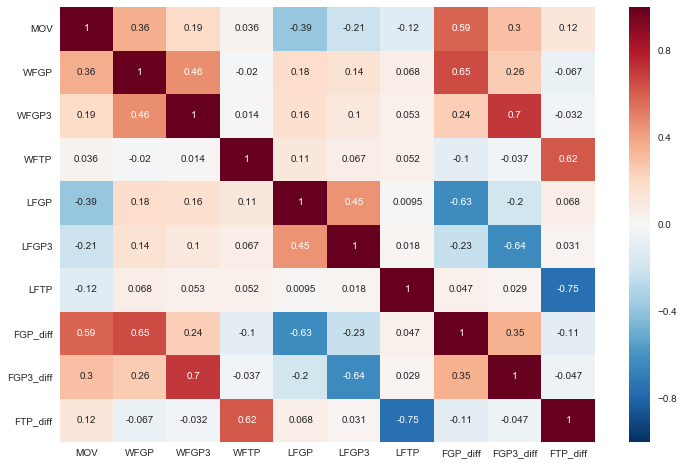

In [480]:

plt.figure(figsize=(12,8))
#plt.title('Correlation Heatmap of Game Statistics', fontsize=18)

sns.heatmap(heat, annot=True)

Here we see that the field goal percentage differences between winning and losing teams has the biggest correlation with margin of victory. That's expected because the majority of points scored in a game usually come from field goals. Another thing I found interesting from this heatmap is that free throw percentage isn't really correlated with anything else. If a team has a good free throw percentage game, that doesn't necessarily mean they are really good at field goals that game. On the other hand, the correlation between field goal percentage and three point percentage is notably higher at .45 and .46 for the losing team and winning teams respectively.

### 2.5 Home Team Advantage

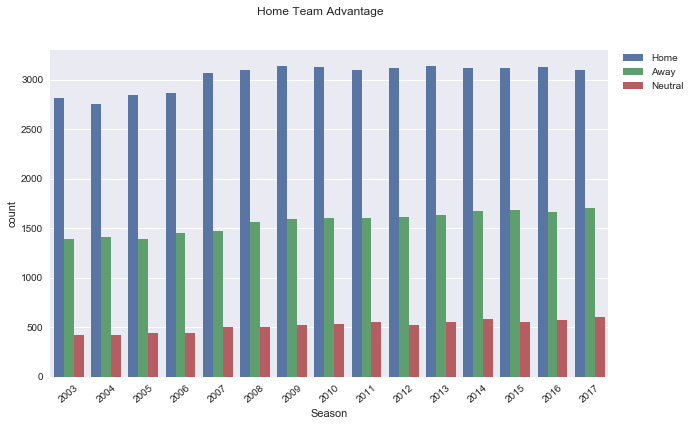

In [489]:
plt.figure(figsize=(10,6))
plt.suptitle('Home Team Advantage')
ax= sns.countplot(x="Season",hue="WLoc",hue_order=['H','A','N'], data=season, linewidth=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
ax.legend(('Home','Away','Neutral'),loc=0, borderaxespad=0., bbox_to_anchor=(1.02,1))


In [490]:
#seams suspicious that there is this extreme of an advantage, 
#check for 2017 to make sure nothing weird is happening with the code  
win2017=sum(season[season['Season']==2017].WLoc=='H')
lose2017= sum(season[season['Season']==2017].WLoc=='A')
print(win2017/(win2017+lose2017)*100)# percent that home team wins

64.4777986241


In [491]:
#now testing within conference home team advantage
test=pd.merge(season[['Season','WLoc','WTeamID','LTeamID']],conf,left_on=['Season','WTeamID'],right_on=['Season','TeamID'],how='inner')
test= test.rename(columns={"ConfAbbrev": "WConfAbbrev"})
test=pd.merge(test,conf,left_on=['Season','LTeamID'],right_on=['Season','TeamID'],how='inner')
test= test.rename(columns={"ConfAbbrev": "LConfAbbrev"})
test=test.drop(['TeamID_x','TeamID_y'], axis=1)
test= test[test.WConfAbbrev==test.LConfAbbrev]
test.head()

,Season,WLoc,WTeamID,LTeamID,WConfAbbrev,LConfAbbrev
1,2003,H,1400,1328,big_twelve,big_twelve
2,2003,A,1400,1328,big_twelve,big_twelve
3,2003,H,1281,1328,big_twelve,big_twelve
4,2003,H,1329,1328,big_twelve,big_twelve
9,2003,H,1341,1106,swac,swac


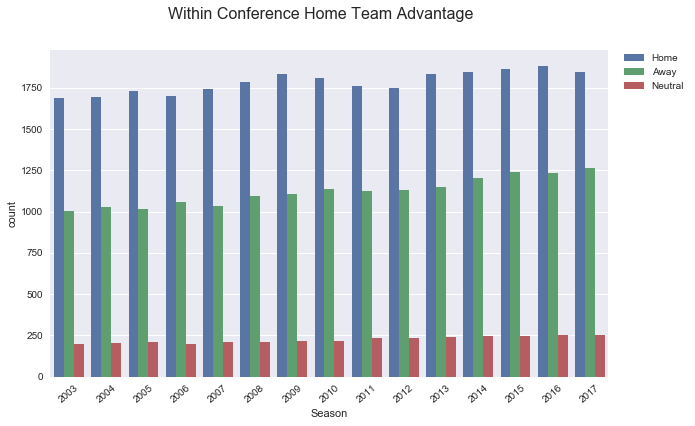

In [513]:
plt.figure(figsize=(10,6))
plt.suptitle('Within Conference Home Team Advantage',fontsize=16)
ax= sns.countplot(x="Season",hue="WLoc",hue_order=['H','A','N'], data=test, linewidth=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
ax.legend(('Home','Away','Neutral'),loc=0, borderaxespad=0., bbox_to_anchor=(1.02,1))
plt.show()

In [495]:
win_count=sum(test.WLoc=='H')
lose_count= sum(test.WLoc=='A')
print(win_count/(win_count+lose_count)*100)# percent that home team wins

61.424277881


Both in conference and overall, the home team advantage is real. It appears that the home team advantage has dimished over the years.

In [497]:
FGP_stat_conf=all_stats_conf.groupby(['Season','Loc'])['FGP'].describe()
FGP3_stat_conf=all_stats_conf.groupby(['Season','Loc'])['FGP3'].describe()
FTP_stat_conf=all_stats_conf.groupby(['Season','Loc'])['FTP'].describe()

FGP_stat_conf.head()

count      mean       std       min       25%       50%  \
Season Loc                                                             
2003   A    2772.0  0.443534  0.074107  0.200000  0.390625  0.440000   
       H    5624.0  0.439920  0.075375  0.192982  0.387097  0.438596   
       N     836.0  0.430548  0.071508  0.200000  0.384352  0.428571   
2004   A    2814.0  0.438111  0.073223  0.194444  0.388889  0.434783   
       H    5498.0  0.438632  0.075313  0.177778  0.385965  0.436364   

                 75%       max  
Season Loc                      
2003   A    0.491525  0.720000  
       H    0.490196  0.720930  
       N    0.478261  0.723404  
2004   A    0.488372  0.733333  
       H    0.490196  0.725000

### 2.6 UVA Basketball is the Best



In [498]:
#making a new dataframe for this with more stats
temp= season[['Season','WTeamID','WLoc','WFGP','WFGP3','WFTP','WOR','WDR','WAst','WTO','WStl','WBlk','WPF']]
temp['Win']=1
temp= temp.rename(index=str,columns={"WTeamID": "TeamID" ,"WLoc":'Loc','WFGP':'FGP','WFGP3':'FGP3','WFTP':'FTP',
                                    'WOR':'OR','WDR':'DR','WAst':'Ast','WTO':'TO','WStl':'Stl','WBlk':'Blk', 'WPF':'PF'})

temp2=season[['Season','LTeamID','WLoc','LFGP','LFGP3','LFTP','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']]
temp2['Win']=0
#switching the location of the game because WLoc associated w winning team
temp2[temp2.WLoc=='H'].WLoc='Away'
temp2[temp2.WLoc=='A'].WLoc='Home'
temp2[temp2.WLoc=='Home'].WLoc='H'
temp2[temp2.WLoc=='Away'].WLoc='A'
temp2= temp2.rename(columns={"LTeamID": "TeamID" ,"WLoc":'Loc','LFGP':'FGP','LFGP3':'FGP3','LFTP':'FTP',
                                    'LOR':'OR','LDR':'DR','LAst':'Ast','LTO':'TO','LStl':'Stl','LBlk':'Blk', 'LPF':'PF'})

more_stats= pd.concat([temp, temp2], ignore_index=True)
more_stats.head()

/Users/ellenbuckley/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ellenbuckley/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ellenbuckley/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Season,TeamID,Loc,FGP,FGP3,FTP,OR,DR,Ast,TO,Stl,Blk,PF,Win
0,2003,1104,N,0.465517,0.214286,0.611111,14,24,13,23,7,1,22,1
1,2003,1272,N,0.419355,0.400000,0.526316,15,28,16,13,4,4,18,1
2,2003,1266,N,0.413793,0.444444,0.586207,17,26,15,10,5,2,25,1
3,2003,1296,N,0.473684,0.333333,0.548387,6,19,11,12,14,2,18,1
4,2003,1400,N,0.491803,0.428571,0.846154,17,22,12,14,4,4,20,1


Here, I am going to pick out the UVA stats and analyze them individually. We have an amazingggg coach: Tony Bennett. No relation to the singer- although sometimes they have twitter exchanges. Tony started in the 2009-2010 and you can see in these stats how the team has improved.

In [499]:
uva_stats=more_stats[more_stats.TeamID==uva_id.iloc[0]]
uva_stats=uva_stats.drop(['TeamID'], axis=1)
#uva_stats.groupby(['Season']).describe()
#plt.plot(uva_stats.groupby(['Season']).mean()['FGP','FGP3','FTP'])
uva_means=uva_stats.groupby(['Season']).mean()

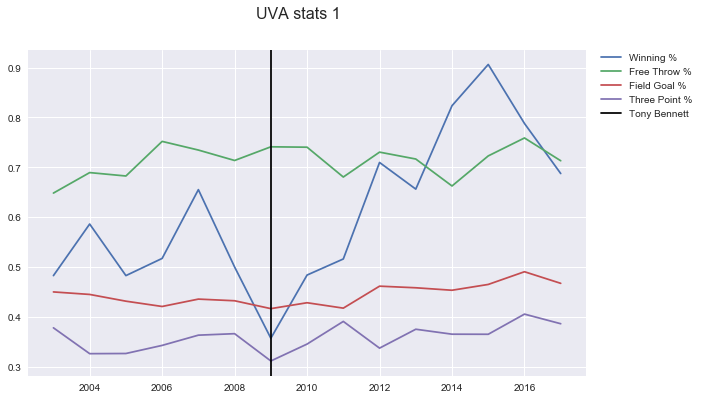

In [505]:
plt.figure(figsize=(10,6))
plt.suptitle('UVA stats 1',fontsize=16)
plt.plot(uva_means.Win)
plt.plot(uva_means.FTP)
plt.plot(uva_means.FGP)
plt.plot(uva_means.FGP3)
plt.axvline(2009,color='k')
plt.legend(['Winning %','Free Throw %', 'Field Goal %', 'Three Point %', 'Tony Bennett'],loc=0, borderaxespad=0., bbox_to_anchor=(1.02,1))

Here, I'm plotting all the percentage stats. Most noteable is the winning percentage per season increasing after Tony becomes coach :). 

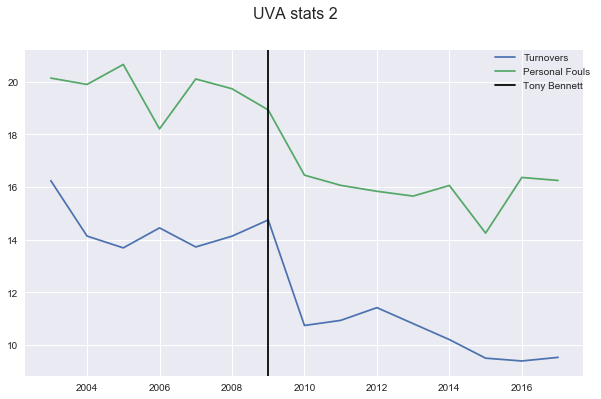

In [506]:
plt.figure(figsize=(10,6))
plt.suptitle('UVA stats 2',fontsize=16)
plt.plot(uva_means.TO)
plt.plot(uva_means.PF)
plt.axvline(2009,color='k')
plt.legend(['Turnovers','Personal Fouls', 'Tony Bennett'],loc=0, borderaxespad=0., bbox_to_anchor=(1.02,1))

Above, you can see the "bad" stats: turnovers and personal fouls, decrease when Tony becomes coach. 

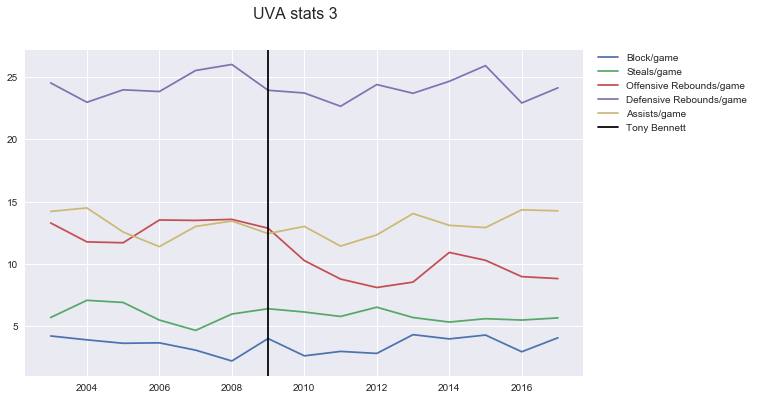

In [507]:
plt.figure(figsize=(10,6))
plt.suptitle('UVA stats 3',fontsize=16)
plt.plot(uva_means.Blk)
plt.plot(uva_means.Stl)
plt.plot(uva_means.OR)
plt.plot(uva_means.DR)
plt.plot(uva_means.Ast)
plt.axvline(2009,color='k')
plt.legend(['Block/game','Steals/game', 'Offensive Rebounds/game', 'Defensive Rebounds/game','Assists/game', 'Tony Bennett'],loc=0, borderaxespad=0., bbox_to_anchor=(1.02,1))

Strangely, the "good" stats don't really change. I think this could be because Tony's style is to slow down the game, so there will be fewer opportunities for all of these situations, so the fact that they have maintained these stats is still impressive. It would be more telling to compare offensive rebounds of UVA v defensive rebounds of their opponent (and vice versa).

In [508]:

uvaWstat=season[season.WTeamID==uva_id.iloc[0]]
uvaLstat=season[season.LTeamID==uva_id.iloc[0]]

uvaWstat['WORp']=(uvaWstat['WOR']/(uvaWstat['WOR']+uvaWstat['LOR']))
uvaWstat['WDRp']=(uvaWstat['WDR']/(uvaWstat['WDR']+uvaWstat['LDR']))
uvaLstat['WORp']=(uvaLstat['WOR']/(uvaLstat['WOR']+uvaLstat['LOR']))
uvaLstat['WDRp']=(uvaLstat['WDR']/(uvaLstat['WDR']+uvaLstat['LDR']))
                  
                  

uvaWstat=uvaWstat.groupby(['Season']).mean()
#oppLstat=uvaWstat.groupby(['Season']).describe()
uvaLstat=uvaLstat.groupby(['Season']).mean()
#oppWstat=uvaLstat.groupby(['Season']).describe()


/Users/ellenbuckley/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/ellenbuckley/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ellenbuckley/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

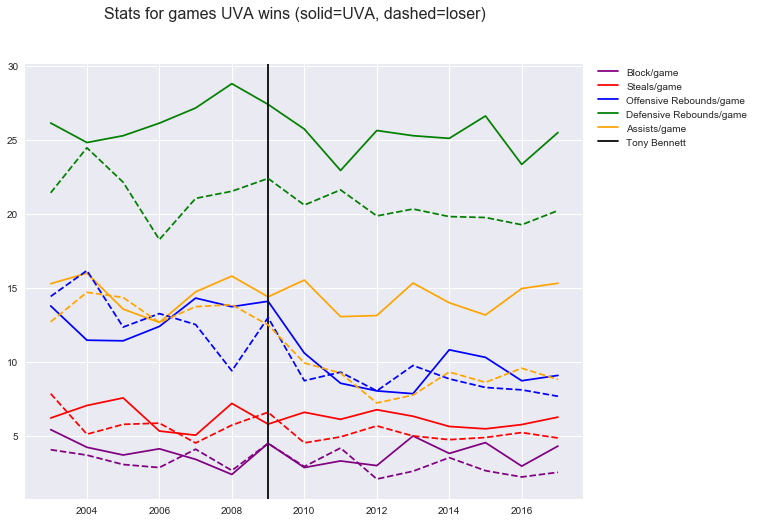

In [509]:
plt.figure(figsize=(10,8))
plt.suptitle('Stats for games UVA wins (solid=UVA, dashed=loser)',fontsize=16)
plt.plot(uvaWstat.WBlk,color='purple')

plt.plot(uvaWstat.WStl,color='red')
plt.plot(uvaWstat.WOR,color='blue')
plt.plot(uvaWstat.WDR,color='green')
plt.plot(uvaWstat.WAst,color='orange')
plt.axvline(2009,color='k')

plt.plot(uvaWstat.LBlk,color='purple',linestyle='dashed')
plt.plot(uvaWstat.LStl,color='red',linestyle='dashed')
plt.plot(uvaWstat.LOR,color='blue',linestyle='dashed')
plt.plot(uvaWstat.LDR,color='green',linestyle='dashed')
plt.plot(uvaWstat.LAst,color='orange',linestyle='dashed')
plt.legend(['Block/game','Steals/game', 'Offensive Rebounds/game', 'Defensive Rebounds/game','Assists/game', 'Tony Bennett'],loc=0, borderaxespad=0., bbox_to_anchor=(1.02,1))



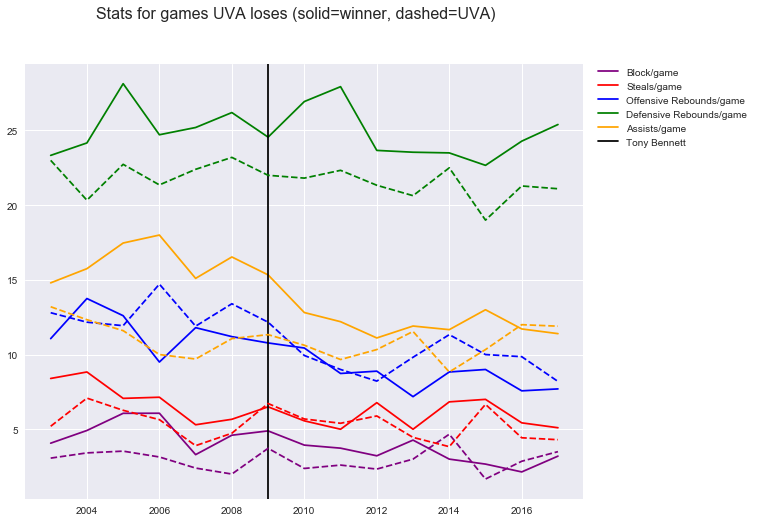

In [510]:
plt.figure(figsize=(10,8))
plt.suptitle('Stats for games UVA loses (solid=winner, dashed=UVA)',fontsize=16)

plt.plot(uvaLstat.WBlk,color='purple')
plt.plot(uvaLstat.WStl,color='red')
plt.plot(uvaLstat.WOR,color='blue')
plt.plot(uvaLstat.WDR,color='green')
plt.plot(uvaLstat.WAst,color='orange')
plt.axvline(2009,color='k')

plt.plot(uvaLstat.LBlk,color='purple',linestyle='dashed')
plt.plot(uvaLstat.LStl,color='red',linestyle='dashed')
plt.plot(uvaLstat.LOR,color='blue',linestyle='dashed')
plt.plot(uvaLstat.LDR,color='green',linestyle='dashed')
plt.plot(uvaLstat.LAst,color='orange',linestyle='dashed')
plt.legend(['Block/game','Steals/game', 'Offensive Rebounds/game', 'Defensive Rebounds/game','Assists/game', 'Tony Bennett'],loc=0, borderaxespad=0., bbox_to_anchor=(1.02,1))


I expected more dramatic results in these graphs. The only noteable trend is a decrease in the number of assists of the opposing team in the games that UVA wins. Also in the games that UVA loses, the opposing team has dropped in number of assists since Tony Bennett start coaching. This is indicative of UVA's defense improvement!

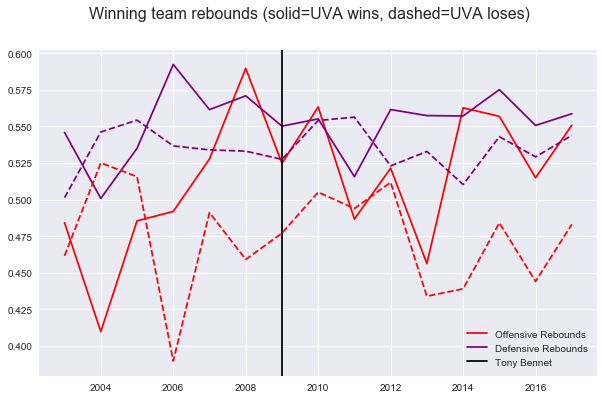

In [511]:
plt.figure(figsize=(10,6))
plt.suptitle('Winning team rebounds (solid=UVA wins, dashed=UVA loses)',fontsize=16)
plt.plot(uvaWstat.WORp,color='red')
plt.plot(uvaWstat.WDRp,color='purple')
plt.axvline(2009,color='k')

plt.plot(uvaLstat.WORp,color='red',linestyle='dashed')
plt.plot(uvaLstat.WDRp,color='purple',linestyle='dashed')
plt.legend(['Offensive Rebounds','Defensive Rebounds','Tony Bennet'])


Here, I was hoping to show that UVA has had increasing rebound percentages, but apparently they haven't. You can see though that defensive rebounding is essntial for winning- the average rebound percent for the winning teams for each season has been great than 50%.

## Conclusions
There are an endless number of ways to look at these data. It is a bit overwhelming. I started with a plan to look at very specific things, but as I went through I thought of new relationships to look at. I also had a lot of hypotheses that were proven wrong. 
The data download was fairly easy, and the data pretty clean and well organized. So, the bulk of this project comes from data visualization and manipulation. I'll probably look through this dataset more, it is really fun to play around with and look for patterns. 
